# Исследование закономерностей, влияющих на успешность компьютерной игры.

## Цель.
Финальной целью данной работы является увеличение эффективности рекламной компании интернет-магазина компьютерных игр, от нас требуется определить закономерности в данных, которые указывают на потенциально успешные игры.

## Данные.
Нам предаставлена таблица games.csv содержащая следующие столбцы:

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 


## План работ.
- Изучим данные, найдем возможные ошибки.
- Предобработаем данные, приведем столбцы к нужным типам, обработаем пропуски и найденные ошибки.
- Рассчитаем суммарные продажи по всем регионам.
- Проведем исследовательский анализ данных:
    - Оценим количество выпускаемых игр по годам, определим важный для анализа период выхода игр;
    - Исследуем популярность разных платформ по времени, определим характерный срок популярности платформы;
    - Определим актуальный период, который поможет построить прогноз на 2017 год;
    - Определим потенциально прибыльные платформы;
    - Оценим влияние отзывов на продажи игр внутри одной платформы;
    - Исследуем общее распределение игр по жанрам, найдем самые прибыльные жанры.
   
- Составим портрет пользователя каждого региона, определим для него:
     - Самые популярные платформы;
     - Самые популярные жанры;
     - Влияние рейтинг ESRB на продажи в регионах.
     
- Проверим две гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

## 1. Предобработка данных.

### 1.1 Анализ входных данных.

In [2]:
game_data = pd.read_csv('/datasets/games.csv')
data_shape = game_data.shape[0]

In [3]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
game_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Мы видим, что большинство данных не содержит информации по продажам игр. Также можем заметить, что оценка критиков является целым числом от 0 до 100, а оценка пользователя - с плавующей точкой от 0 до 10.

Рассмотрим уникальные значения столбца `User_Score`, возможно это поможет нам понять, почему pandas присвоил этому столбцу тип object.

In [6]:
game_data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных есть значение `tbd` - оно указывает на то, что рейтинг не рассчитан из-за недостатка количества оценок.

Посмотрим на пропуски.

In [7]:
(game_data.isnull().sum()/game_data.shape[0]*100).sort_values(ascending = False)

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Genre               0.011965
Name                0.011965
Other_sales         0.000000
JP_sales            0.000000
EU_sales            0.000000
NA_sales            0.000000
Platform            0.000000
dtype: float64

In [8]:
game_data[(game_data['User_Score'].isna())].sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15623,Winter Blast: 9 Snow & Ice Games,Wii,2010.0,Sports,0.02,0.00,0.00,0.00,NaN,NaN,NaN
16360,Makai Senki Disgaea 3 Append Disc: Raspberyl-h...,PS3,2009.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11278,Great Party Games,Wii,2010.0,Misc,0.00,0.07,0.00,0.01,NaN,NaN,NaN
15943,Professional Farmer 2016,PS4,2015.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN
287,Street Fighter II Turbo,SNES,1992.0,Fighting,1.42,0.51,2.10,0.07,NaN,NaN,NaN


Мы видим, что в данных с пропусками, сразу отсутствует все 3 столбца, это может быть связанно с попульрностью игр. Большинство объектов, которые мы видим, обладают либо маленьким количеством продаж, либо вышли очень давно.
Очевидно, что пропуски появились из-за маленькой популярности игры и не зависят от других причин.

### Выводы.
Необходимо поменять название столбцов, привести столбец `Year_of_Release`,`Critic_Score` и `User_Score` к типу int, перед  этим обработав значение tbd.
Мы получили набор данных содержащий около половины пропусков в столбцах с интересующей нас информацией. 
Так как мы пришли к выводу, что пропуски не зависят от других данных, то мы можем только удалить их.

### 1.2 Предобработка данных.
Приведем название столбцов к общепринятому виду.

In [9]:
game_data.columns = [x.lower() for x in list(game_data.columns)]

Так как значение `tbd` в столбце `user_score` фактически означает отсутствие рейтинга, то корректно будет заменить его на nan.

In [10]:
tbd_filter = game_data['user_score'] == "tbd"
game_data.loc[tbd_filter, 'user_score'] = np.NaN

Посмотрим на данные, где пропущен год выхода игр.

In [11]:
game_data[game_data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [12]:
game_data[game_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Есть 269 бъектов, у которых отсутствует дата выхода, это может быть связанно, с ошибкой выгрузки, мы могли бы найти информацию в интернет и заполить эти пропуски, но из-за недостатка времени просто удалим эти строки, также мы удалим данные в которых нет информации о названии и жанре. 

In [13]:
game_data.dropna(subset=['name', 'year_of_release'], inplace=True)

In [14]:
game_data[game_data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Мы решили оставить пропуски в данных, так как это поможет увеличить количество информации для анализа вопросов не связанных с оценками.

Приведем столбцы к удобным для нас типам данных. Столбец `year_of_release` приведем к целочисленному типу, так как год выхода не может быть дробным.

In [15]:
game_data['user_score'] = game_data['user_score'].astype('float64', errors='ignore')
game_data['critic_score'] = game_data['critic_score'].astype('int64', errors='ignore')
game_data['year_of_release'] = game_data['year_of_release'].astype('int64', errors='ignore')

Переведем оценки пользователей к 100 бальной шкале и преобразуем тип данных в `int`.

In [16]:
game_data.loc[:,'user_score'] *= 10

In [17]:
game_data['user_score'] = game_data['user_score'].astype('int64', errors='ignore')
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Добавим в таблицу информацию об общих продажах.

In [18]:
game_data['all_sales'] = (game_data['na_sales'] + game_data['eu_sales'] + 
                          game_data['jp_sales'] + game_data['other_sales'])

Рассчитаем количество данных, по которым мы сможем проводить анализ

In [19]:
print('Процент оставшихся данных', game_data.shape[0] / data_shape)

Процент оставшихся данных 0.9837870176488184


### Выводы.
Мы привели столбцы к нужным нам типам  и избавились от пропусков в тех объектах, в которых мы не можем восстановить значения.

## Выводы по разделу 1
Мы изучили полученные данные, преобразовали значения tbd в nan, так как фактически мы не имеем информации о этих значениях и удалили строки, которые не содержат год выпуска и название игр.

Столбец year_of_release был приведен к целочисленному типу, так как это интервальные данные, как и столбец user_score, ведь изначально pandas неправильно определил этот тип данных из-за наличие переменной tbd, которая оказалась равнозначна пропуску в данных.

По результатам предобработки данных мы потеряли 2% нашего датасета.


## 2. Исследовательский анализ

### 2.1 Определим интересный для анализа период времени
Для начала посмотрим на количество продаж игр по годам и определим важный для анализа период времени.

In [20]:
year_bins = len(game_data['year_of_release'].unique())

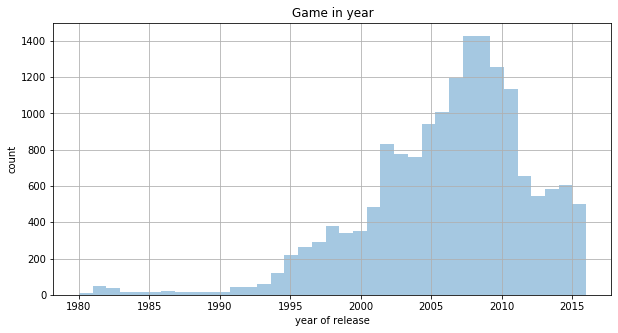

In [21]:
plt.figure(figsize=(10,5))
plt.grid(True)
ax = sns.distplot(game_data['year_of_release'], kde=False, bins=year_bins);
ax.set(xlabel='year of release', ylabel='count', title='Game in year');

На графике мы видим, что временной интервал можно разбить на 4 отрезка, до 1995 года, когда выходило очень мало игр, с 1995 по 2000, количество игр не превышало  300 в год и с 2000 года, когда ежегодно выходило больше 500 игр и с 2011, когда выход игр перестал быть столь мыссовым.

Мы можем сделать вывод, что наиболее интересный интервал времени с 2011 года.

###  Исследуем популярность разных платформ по времени, определим средний срок жизни популярных платформ.
Для оценки популярности платформы посмотрим на суммарные продажи игр по времени. Для того, чтобы наш график не засорялся большим количеством платформ, оставим платформы с наибольшим количеством продаж.

In [22]:
platform_sales = game_data.groupby('platform')['all_sales'].sum()

most_sales = platform_sales.quantile(0.85)

In [23]:
interest_platform = platform_sales[platform_sales > most_sales].index

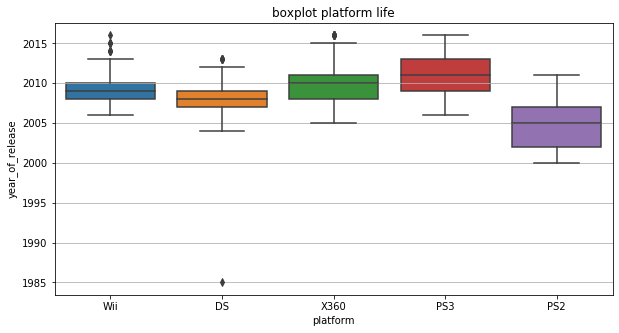

In [24]:
platform_info = game_data[game_data['platform'].isin(interest_platform)];

plt.figure(figsize=(10,5))
plt.grid(True)
ax = sns.boxplot(y='year_of_release' , x='platform', data=platform_info);
ax.set_title('boxplot platform life');

In [25]:
release_years = platform_info.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
release_years['peiod'] = release_years.iloc[:,1] - release_years.iloc[:,0]
release_years = release_years.drop(['DS'], axis=0)

print(release_years)
print('среднее время жизни игровой платформы:', release_years['peiod'].mean())

                     min             max peiod
         year_of_release year_of_release      
platform                                      
PS2                 2000            2011    11
PS3                 2006            2016    10
Wii                 2006            2016    10
X360                2005            2016    11
среднее время жизни игровой платформы: 10.5


In [26]:
game_data.pivot_table(index='platform', 
                      values='year_of_release', 
                      aggfunc=['min', 'max']).sort_values(by=('min', 'year_of_release'),
                                                          ascending=False).head(10)

,min,max
,year_of_release,year_of_release
platform,,
XOne,2013,2016
PS4,2013,2016
WiiU,2012,2016
3DS,2011,2016
PSV,2011,2016
PS3,2006,2016
Wii,2006,2016
X360,2005,2016


Мы видим, что в среднем современная платформа "живет" 10.5 лет. При этом каждые 6 лет выходят новые игровые консоли.

### Выводы.
Исследовав количество вышедших игр и средний срок жизни платформы, мы можем определить актуальный для исследования период. Мы прогнозируем на 2017 год, следовательно мы можем взять за точку отсчета - 2011 год, это наименьшйи год выхода для всех актуальных на момент составления датасета игровых платформ.

Уберем из данных все строки с годом выхода меньше 2011.

In [27]:
actual_game_data = game_data.query('year_of_release >= 2011')
actual_game_data['platform'].value_counts()

PS3     708
3DS     512
X360    498
PSV     429
PS4     392
PC      389
PSP     312
XOne    247
Wii     197
DS      184
WiiU    147
PS2       7
Name: platform, dtype: int64

В нашем наборе данных остались платформы с маленьким количеством игр, удалим их.

In [28]:
actual_game_data = actual_game_data[~actual_game_data['platform'].isin(['PS2'])]

### 2.2 Определим потенциально прибыльные платформы.
Потенциально прибыльной можно считать ту платформу, у которой на момент 2015 года росли продажи, также можно не рассматривать консоли, у которых за последний год не было продаж.

In [29]:
platform_pivot = actual_game_data.pivot_table(index='year_of_release', columns='platform',
                                       values='all_sales', aggfunc='sum')



platform_pivot = platform_pivot[platform_pivot.loc[2016].dropna().index]
platform_pivot = platform_pivot.drop(2016)
platform_pivot

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2011,63.20,35.03,156.78,NaN,4.63,59.65,NaN,143.84,NaN
2012,51.36,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14


Text(0.5, 1.0, 'platform sales trend')

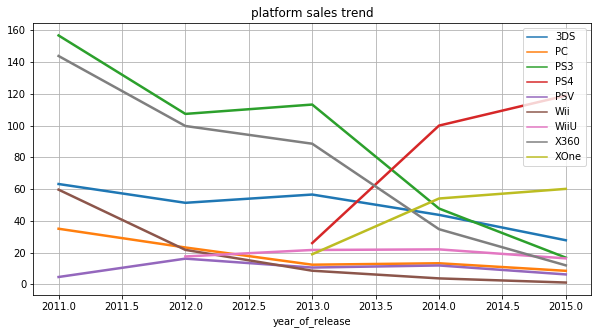

In [30]:
plt.figure(figsize=(10,5))
plt.grid(True)
sns.lineplot(data=platform_pivot, dashes=False, linewidth=2.5).set_title('platform sales trend')

На графике видно, что перспективными игровыми платформами на момент 2016 года можно считать:
 - PS4;
 - XOne;
 - WiiU;
 - PC.
 
Посмотрим на глобальные продажи игр в разбивке по платформам.

Text(0.5, 1.0, 'platform sales boxplot')

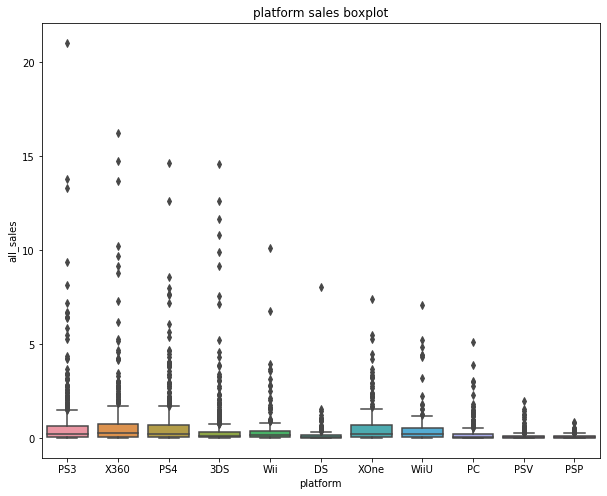

In [31]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='platform', y='all_sales', data=actual_game_data)
ax.set_title('platform sales boxplot')

Приблизим график по оси `y`.

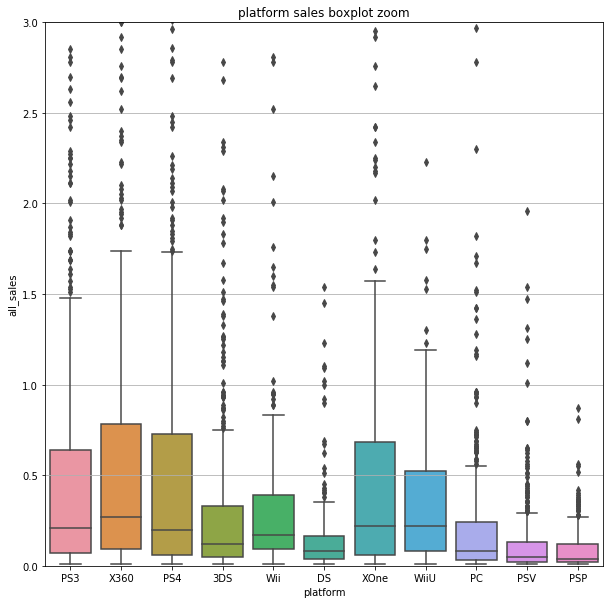

In [32]:
plt.figure(figsize=(10,10))
plt.grid(True)
ax = sns.boxplot(x='platform', y='all_sales', data=actual_game_data);
ax.set_title('platform sales boxplot zoom');
ax.set_ylim(0, 3);

In [33]:
actual_game_data.groupby('platform').agg(['mean','median','count','sum'])['all_sales']

,mean,median,count,sum
platform,,,,
3DS,0.503535,0.12,512,257.81
DS,0.210489,0.08,184,38.73
PC,0.251105,0.08,389,97.68
PS3,0.629336,0.21,708,445.57
PS4,0.801378,0.20,392,314.14
PSP,0.092981,0.04,312,29.01
PSV,0.125431,0.05,429,53.81
Wii,0.482335,0.17,197,95.02
WiiU,0.559116,0.22,147,82.19


График представляет из себя набор выбросов, изучив медиану выручки и количество игр, приходим к выводу, что большой вклад в количество проданных игр по платформам делают несколько десятков хитов. Причем консоли нового поколения делают упор на такие игры.

### Выводы.
Проанализировав график зависмости количества проданых копий от года, мы смогли выделить потенциально прибыльные платформы, на 2016 год это были:
 - PS4;
 - XOne;
 - WiiU;
 - PC.

Также мы пришли к выводу, что большой вклад в общую прибыль по платформам делают отдельные хиты. Распределение по плотформам показывает, что основная борьба идет между `PS` и `Xbox`, отстаёт от них `wii`. Рынок игр на PC один из самых скромных, поэтому издатели крупных игр чаще делают игры под определенную консоль.

### 2.3 Оценим влияние отзывов на продажи игр внутри одной платформы.
Целевой платформой для исследования выберем перспективную платформу с максимальным количеством информации.

In [34]:
actual_game_data.groupby('platform').count()['name']

platform
3DS     512
DS      184
PC      389
PS3     708
PS4     392
PSP     312
PSV     429
Wii     197
WiiU    147
X360    498
XOne    247
Name: name, dtype: int64

Выбираем PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [35]:
PS4_sales_score = actual_game_data.query('platform == "PS4"')[['all_sales', 'critic_score', 'user_score']]

<Figure size 576x576 with 0 Axes>

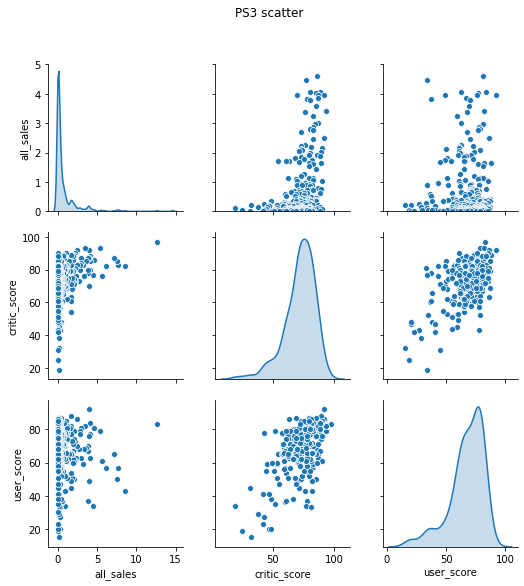

In [36]:
plt.figure(figsize=(8,8));
ax = sns.pairplot(PS4_sales_score, palette='Set1', diag_kind='kde');
ax.axes[0,1].set_ylim(0,5);
ax.fig.suptitle("PS3 scatter", y=1.08);

По диаграмме рассеивания трудно судить о степени влияния оценки критиков и пользователей на суммарные продажи в мире.

Мы можем утверждать, что большая часть самых продаваемых игр была оценена критиками от 80 до 100 баллов. Хоть мы и видим, что есть положительная связь между рейтингом критиков и пользователей, но в части хитов, их оценки кардинально отличаются.

Ещё одна интересная особенность, которую мы можем увидеть на графике - если игра имеет высокий рейтинг у пользователей, то больше вероятность, что она высоко оценена и критиками, чем в обратном случае. 


,all_sales,critic_score,user_score
all_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


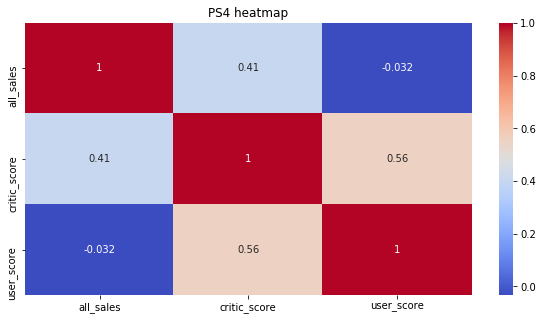

In [37]:
display(PS4_sales_score.corr())
plt.figure(figsize=(10,5))
sns.heatmap(PS4_sales_score.corr(),cmap='coolwarm',annot=True).set_title('PS4 heatmap');

Отсечем игры с количеством суммарных продаж больше 5млн., именно с этой цифры на графике начинаются видимые рассхождения между оценками, и посмотрим корреляцию.

In [38]:
display(PS4_sales_score.query('critic_score-user_score <= 5').corr())

,all_sales,critic_score,user_score
all_sales,1.000000,0.364434,0.224772
critic_score,0.364434,1.000000,0.791266
user_score,0.224772,0.791266,1.000000


По значениям корреляции мы можем сделать вывод, что количество проданных копий игры в большей степени зависит от оценки критиков, чем от рейтинга пользователей.

Возможно это связанно с тем, что для создания ажиотажа перед выходом игры зачастую используют оценки известных игровых обозревателей, которые могут работать в интересах издателей. Вышедшая игра, хоть и показывает хорошие продажи, но попадает под завышенные ожидания пользователей.

При этом, если отсечь игры с наибольшим количеством продаж, то значения корреляции становятся схожи.

Проверим, есть ли связь у игр в которых сильно рассходится оценка пользователей и критиков.

In [39]:
strange_game_filtr = (actual_game_data['all_sales'] > 7) & (actual_game_data['platform']=='PS4')
actual_game_data[strange_game_filtr].sort_values(by=['critic_score', 'user_score']).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62


Судя по данным, корпорация, которая выпускает эти игры, закладывает большую долю в бюджете на отзывы критиков, а не на игровую механику.

### Выводы
Проанализировав влияние отзывов пользователей и критиков на продажи по отдельно взятой игровой консоли PS3, мы приходим в к выводу, что существует связь между оценкой критиков и количеством проданных игр. Коэффициент корреляции у этой связи - `0.36`. 

На диаграмме рассеяния видно, что для большей части вышедших игр оценки пользователей и критиков зависят друг от друга, это подтверждает и коэффициент корреляции `0.79`,  но для самых продаваемых игр, ситуация, зачастую, обратная. Проанализировав это рассхождение, мы видим, что в основном - это игры одной серии. Можем сделать вывод, что некоторые компании используют игровых обозревателей для улучшения продаваемости.

Если убрать игры, с количеством суммарных продаж больше 5 млн., то значения корреляции становятся близкими друг к другу. Можем сделать вывод, что если рассматривать не блокбастеры, а обычные игры, то отзывы пользователей и критиков имеют схожую связь с продажами.

Данный анализ мы можем расспространить на все остальные игровые платформы, ведь бизнес-модель продвижения игры схожа для любой из них.


### 2.4 Исследуем игровые жанры на прибыльность.
Посмотрим на распределение игр по жанрам.

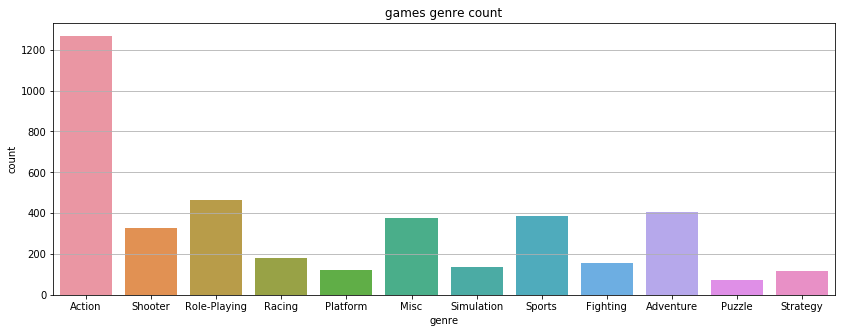

In [40]:
plt.figure(figsize=(14,5))
plt.grid(True)
g = sns.countplot(x='genre', data=actual_game_data).set_title('games genre count');

Самый популярный жанр по количеству игр - `action`, за ним идут `rpg`, `Adventure` и `sports`.

Посмотрим на расспределение прибыли по жанрам.

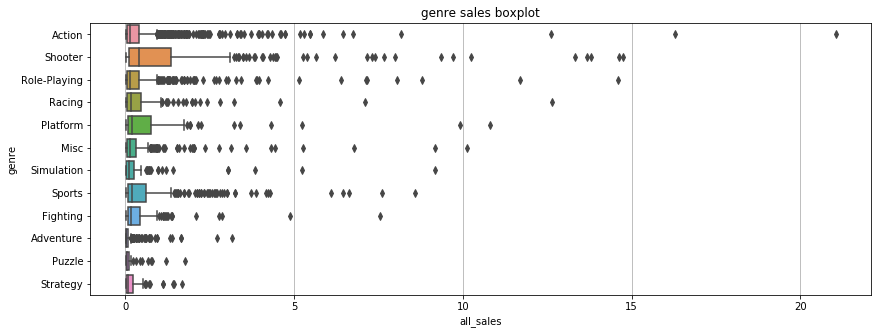

In [41]:
plt.figure(figsize=(14,5))
plt.grid(True)
ax = sns.boxplot(x='all_sales', y='genre', data=actual_game_data).set_title('genre sales boxplot');

Уже сейчас мы можем сказать, что продажи по жанрам отличаются, приблизим график по оси Х, так мы сможем точнее определить основное распределение.

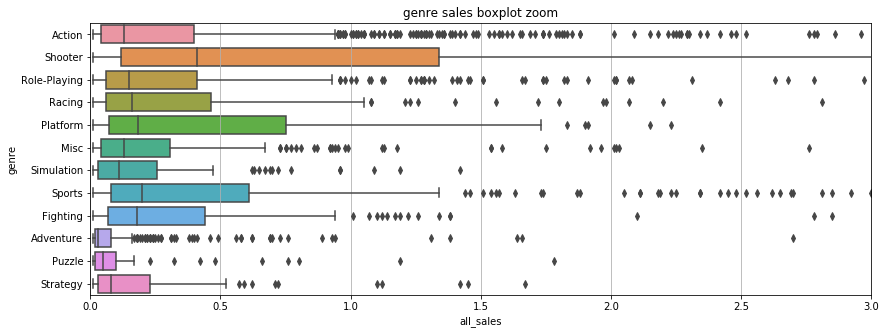

In [42]:
plt.figure(figsize=(14,5))
plt.grid(True)
ax = sns.boxplot(x='all_sales', y='genre', data=actual_game_data);
ax.set_title('genre sales boxplot zoom');
ax.set_xlim(0, 3);

Больше всего продается игр жанра shooter, это объясняется и большим количеством вышедших игр, для уверенности в выводах, посчитаем отношение количество проданных игр к общему числу вышедших игр по платформе.

In [43]:
group_by_genre = actual_game_data.groupby('genre')['all_sales'].agg(['sum', 'count'])
genre_sales = group_by_genre['sum']/group_by_genre['count']
print(genre_sales)

genre
Action          0.439858
Adventure       0.110319
Fighting        0.422785
Misc            0.371787
Platform        0.726885
Puzzle          0.138732
Racing          0.490611
Role-Playing    0.528237
Shooter         1.224650
Simulation      0.369559
Sports          0.613705
Strategy        0.189402
dtype: float64


По этим данным мы можем сделать вывод, что жанры с наибольшим относительным количеством продаж - это `Shooter` и `Sports`, игры жанра `Adventure` и `Puzzle` мы можем отнести к жанрам с низкими продажами. 

Разделим жанры на 3 категории.

In [44]:
x_low = genre_sales.quantile(0.25)
x_high = genre_sales.quantile(0.75)
print("low sales genre:", ', '.join(genre_sales[genre_sales <= x_low].index))
print("high sales genre:", ', '.join(genre_sales[genre_sales >= x_high].index))
print("medium sales genre:", ', '.join(genre_sales[(genre_sales > x_low) & (genre_sales < x_high)].index))

low sales genre: Adventure, Puzzle, Strategy
high sales genre: Platform, Shooter, Sports
medium sales genre: Action, Fighting, Misc, Racing, Role-Playing, Simulation


### Вывод
По результатам анализа распределения игровых жанров по общим продажам, мы смогли разделить их на 3 группы.
Жанры с высоким количеством продаж:
   - Platform
   - Shooter
   - Sports
   
Жанры с низким количеством продаж:
   - Adventure
   - Puzzle
   - Strategy
   
Жанры с обычным количеством продаж:
   - Action
   - Fighting
   - Racing
   - Role-Playing
   - Simulation
   - Fighting

## Выводы по разделу.

Мы провели исследовательский анализ наших данных. Определив, что среднее время жизни игровой платформы составляет 10 лет и посмотрев на распределение количества вышедших игр по годам, мы выбрали актуальный для нас отрезок времени, это период начиная с 2008 года.

Для оценки перспективности платформы мы построили график зависимости количества проданных копий игр от года, по нему мы выбрали те платформы, продажи по которым росли на конец 2015 года. Таким образом мы смогли определить 4 перспективные платформы:
 - PS4;
 - XOne;
 - WiiU;
 - PC.
 
Проанализировав распределение количества продаж по платформам, мы пришли к выводу, что они схожи между собой, отличает их количество выбросов, которые являются играми с большим количеством продаж, которые оказывают существенное влияние на популярность платформы.

Оценивая влияние отзывов на продажи, мы нашли группу игр, у которых сильно рассходится пользовательская оценка и рейтинг критиков, причем, в основном, это игры, которые имеют большое количество продаж. Мы пришли к выводу, что это связано с тем, что критики зачастую бывают заинтересованы в выставлении необычно высоких оценок играм, что в итоге приводит к разочарованию конечного пользователя. 
 Избавившись от таких аномальных игр, мы получили, что оценки пользователей и критиков схоже взаимосвязаны с количеством продаж, со следующими коэффициентами корреляции:
- all_sales/critic_score = 0.49
- all_sales/user_score = 0.35
- critic_score/user_score = 0.84

Учитывая то, что платформы имеют схожий график распределения игр по продажам, мы смогли экстраполировать вывод по одной конкретной платформе на все остальные.

 Проведя оценку прибыльности игр по жанрам, мы определили, что самые прибыльные жанры это:
- Platform 
- Shooter  
- Sports 

Жанры с наименьшим количеством продаж:
- Adventure
- Puzzle
- Strategy
   

## 3. Определение типичного портрета пользователя по регионам.

Для определения типично пользователя, найдем длz каждого региона следующие данные:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 3.1 Определим самые популярные платформы по регионам.

In [45]:
def pie_plot(_sales_favor, _labels, _name, _fig_size, _radius, _pad):
    plt.show();
    print(_name)


    fig, axs = plt.subplots(2, 2, figsize=_fig_size);

    # A standard pie plot
    axs[0, 0].pie(_sales_favor['na'], labels=labels, autopct='%1.1f%%', radius=_radius)
    axs[0, 0].set_title('NA_region', loc='left', size=16, pad=_pad)

    # Shift the second slice using explode
    axs[0, 1].pie(_sales_favor['eu'], labels=labels, autopct='%.0f%%', radius=_radius)
    axs[0, 1].set_title('EU_region', loc='left', size=16, pad=_pad)

    axs[1, 0].pie(_sales_favor['jp'], labels=labels, autopct='%.0f%%', radius=_radius)
    axs[1, 0].set_title('JP_region', loc='left', size=16, pad=_pad)

    axs[1, 1].pie(_sales_favor['other'], labels=labels, autopct='%.0f%%')
    axs[1, 1].set_title('OTHER_region', loc='left', size=12);

In [46]:
platform_data = actual_game_data.groupby('platform').sum()

sales_favor = pd.DataFrame()

sales_favor['na'] = platform_data['na_sales'] / platform_data['na_sales'].sum()
sales_favor['eu'] = platform_data['eu_sales'] / platform_data['eu_sales'].sum()
sales_favor['jp'] = platform_data['jp_sales'] / platform_data['jp_sales'].sum()
sales_favor['other'] = platform_data['other_sales'] / platform_data['other_sales'].sum()

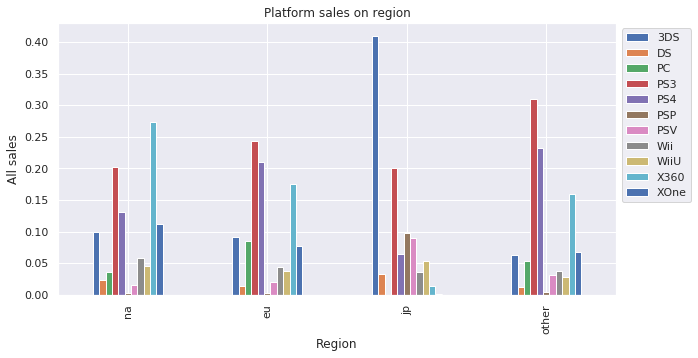

In [47]:
sns.set()
ax = sales_favor.T.plot(kind='bar', figsize=(10,5))

ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('All sales')
plt.xlabel('Region')
plt.title("Platform sales on region")

plt.grid(True)
plt.show()

In [48]:
sales_favor.sort_values(by='jp')

,na,eu,jp,other
platform,,,,
PC,0.036016,0.084670,0.000000,0.053158
XOne,0.112243,0.077039,0.001385,0.068340
X360,0.273375,0.174865,0.013642,0.158661
DS,0.022733,0.013798,0.032741,0.012404
Wii,0.058532,0.044202,0.036529,0.037786
WiiU,0.045924,0.037527,0.052981,0.028495
PS4,0.131070,0.210689,0.064994,0.231550
PSV,0.015031,0.019517,0.088940,0.030794
PSP,0.002640,0.002643,0.097899,0.004837


### Вывод

Топ-5 по регионам выглядит следующим образом:

    NA:                  EU:                 JP:
    1. X360(0.27)        1. PS3(0.24)        1. 3DS(0.4)
    2. PS3(0.20)         2. PS4(0.21)        2. PS3(0.24)
    3. PS4(0.13)         3. X360(0.17)       3. PSP(0.09)
    4. XOne(0.11)        4. 3DS(0.09)        4. PSV(0.08)
    5. 3DS(0.09)         5. PC(0.08)         5. PS4(0.6)
    
Мы видим, что рынок Японии больше ориентирован на портативные платформы, доля продаж на них составляет 46% от общего числа продаж в Японии. 

Самая популярная платформа - `PS3`, она занимает первое место в Европе(24%), в Северной Америке и Японии второе место с охватом 20% и 24% соотвественно.

На втором месте `X360`, она занимает первое место в Северной Америке(27%) и третье в Европе(17%).

Японский рынок очень локальный.

### 3.2 Определим популярные жанры по регионам.

In [49]:
genre_data = actual_game_data.groupby('genre').sum()

sales_favor = pd.DataFrame()

sales_favor['na'] = genre_data['na_sales'] / genre_data['na_sales'].sum()
sales_favor['eu'] = genre_data['eu_sales'] / genre_data['eu_sales'].sum()
sales_favor['jp'] = genre_data['jp_sales'] / genre_data['jp_sales'].sum()
sales_favor['other'] = genre_data['other_sales'] / genre_data['other_sales'].sum()

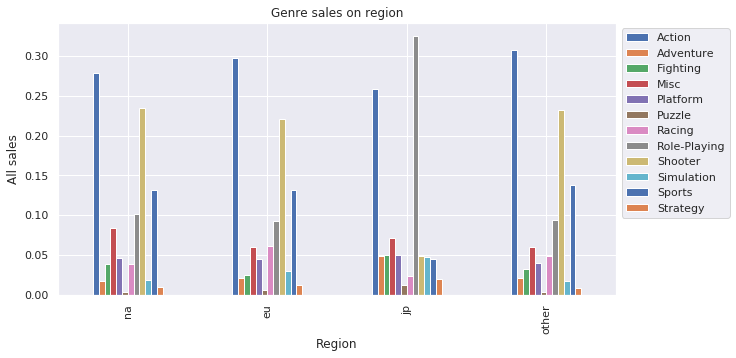

In [50]:
sns.set()
ax = sales_favor.T.plot(kind='bar', figsize=(10,5))

ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('All sales')
plt.xlabel('Region')
plt.title("Genre sales on region")

plt.grid(True)
plt.show()

In [51]:
sales_favor.sort_values(by='jp')

,na,eu,jp,other
genre,,,,
Puzzle,0.003303,0.005316,0.011850,0.003065
Strategy,0.009016,0.011976,0.019466,0.009003
Racing,0.038547,0.060598,0.022968,0.048417
Sports,0.130926,0.131992,0.045162,0.137877
Simulation,0.018526,0.029448,0.047402,0.016905
Shooter,0.234357,0.221038,0.048542,0.232460
Adventure,0.017791,0.020846,0.049031,0.020353
Platform,0.046141,0.044903,0.049397,0.039270
Fighting,0.038065,0.024191,0.050415,0.031799


### Вывод

Топ-5 по регионам выглядит следующим образом:

    NA:                          EU:                           JP:
    1. Action(0.27)              1. Action(0.29)               1. Role-Playing(0.32)
    2. Shooter(0.23)             2. Shooter(0.22)              2. Action(0.26)
    3. Sports(0.13)              3. Sports(0.12)               3. Misc(0.07)
    4. Role-Playing(0.10)        4. Role-Playing(0.09)         4. Fighting(0.05)
    5. Misc(0.08)                5. Racing(0.06)               5. Platform(0.05)
    
Если рассматривать по жанрам, то рынок Северной Америки схож с рынком Европы, единственное отличие, что в Европе в топе присутствуют гоночные игры. Рынок Японии сильно отличается от остальных. Так как там преобладают портативные консоли, то больший охват имеют платформеры и РПГ.


Самый популярный жанр - `Action`, он занимает первое место почти во всех регионах с средним охватом 28%.

### 3.3 Определим влияние возрастного рейтинга на продажи по регионам. 

In [52]:
actual_game_data = actual_game_data[actual_game_data['rating'] != -1]
actual_game_data['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

Для того, чтобы учесть игры без присвоенного рейтинга, заменим пропуски в этих данных на значение "NI" - no information.

In [53]:
actual_game_data['rating'].fillna('NI', inplace=True)

In [54]:
raiting_dara = actual_game_data.groupby('rating').sum()

sales_favor = pd.DataFrame()

sales_favor['na'] = raiting_dara['na_sales'] / raiting_dara['na_sales'].sum()
sales_favor['eu'] = raiting_dara['eu_sales'] / raiting_dara['eu_sales'].sum()
sales_favor['jp'] = raiting_dara['jp_sales'] / raiting_dara['jp_sales'].sum()
sales_favor['other'] = raiting_dara['other_sales'] / raiting_dara['other_sales'].sum()

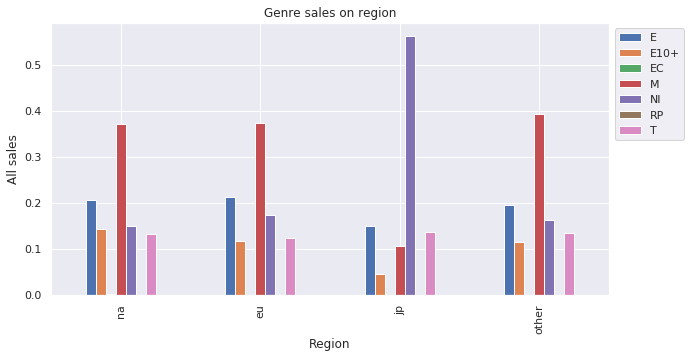

In [55]:
sns.set()
ax = sales_favor.T.plot(kind='bar', figsize=(10,5))

ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('All sales')
plt.xlabel('Region')
plt.title("Genre sales on region")

plt.grid(True)
plt.show()

In [56]:
sales_favor.sort_values(by='na')

,na,eu,jp,other
rating,,,,
RP,0.000000,0.000045,0.000000,0.000048
EC,0.000506,0.000000,0.000000,0.000144
T,0.131697,0.124123,0.135975,0.134859
E10+,0.141895,0.116477,0.045732,0.114506
NI,0.149091,0.174103,0.562714,0.162396
E,0.205019,0.211540,0.149129,0.195537
M,0.371792,0.373712,0.106451,0.392510


### Вывод


График охвата игр по рейтингу ESRB показывает, что рэйтинг не оказывает влияние на распределение игр по Североамериканскому и Европейскому рынкам, но сильно влияет на Японский. 

В Японии сильно меньше продается игр с рейтингом `М`, их место занимают игры с рейтингом `Е` и `Т`, скорее всего это связано с тем, что в японии больше популярным платформеры и рпг, которые, в большинстве своем, имеют рейтинг `Т`, а вот шутеры не так распространены, поэтому доля игр с рейтингом `М` мала.

При этом в Японии более половины всех проданных игр - не имеют рейтинга. Это может означать, что в Японии более локальный рынок и местным издателям не обязательна такая сертификация выпускаемой продукции.

## Выводы по разделу.
Проведя анализ распространённости платформ, жанров и игр с разными возрастными рейтингами, мы можем составить портрет пользователя для каждого региона.

Пользователи из Северной Америки предпочитают платформу `X360`, на втором месте с большим отрывом `PS3`, на третьем `Wii`, также, как игровая платформа не распространён персональный компьютер. Самые популярные жанры - это `Action`, `Sports` и `Shooter`, при этом возрастной рейтинг игр не имеет влияния на продажи в регионе.

Европейские пользователи почти одинаково используют `PS3` и `X360`, `Wii` занимает третье место. Европейцы чаще используют персональные компьютеры для игр. К любимым жанрам, помимо `Action`, `Sports` и `Shooter`, добавились гоночные симуляторы. Возрастной рейтинг игр не имеет влияния на продажи в регионе.

Пользователи из Японии сильно отличаются от пользователей из остальных регионов. Они используют только местные платформы `PS3`, `DS`, более распространены портативные консоли `3DS`, `DS`, `PSP`. Из-за большой распространенности портативных платформ в Японии большую часть рынка занимают  РПГ, экшен и платформеры. Также стоит учитывать, что игры с возрастным рейтингом `M` продаются куда хуже, чем с рейтингами `E` и `T`, но при этом, основная часть игр продается без рейтинга.

## 4. Проверка гипотез
Нам необходимо проверить две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки этих гипотез будем использовать двусторонний т-тест, который оценивает вероятность того, что различия в распределениях обусловлены случайностью. Пороговое значение примем равным 0.05.

Сформулируем гипотезы о равенстве средних проверяемых выборок.

### 4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем нулевую гипотезу H0.

    H0 - Средние пользовательских рейтингов платформ Xbox One и PC равны.
    H1 - Средние отличаются.
Вначале сравним дисперсии выборок, для того, чтобы решить, является ли они схожими.

In [57]:
alpha = 0.05

In [58]:
nan_filt = ~actual_game_data['user_score'].isna()
Xbox_user_rscore = actual_game_data[nan_filt].query('platform == "XOne"')['user_score']
PC_user_rscore = actual_game_data[nan_filt].query('platform == "PC"')['user_score']
print(Xbox_user_rscore.var(), '\n',
      PC_user_rscore.var())

190.69968429360694 
 259.6295799535884


Так как диспресии различаютс, то equal_var = False

In [59]:
results = st.ttest_ind(
        Xbox_user_rscore,
        PC_user_rscore)

print('p_value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p_value: 0.6267602271422468
Не можем отвергнуть нулевую гипотезу


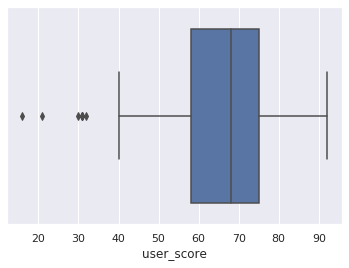

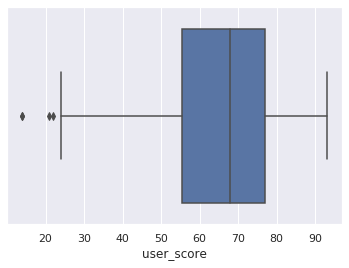

In [60]:
sns.boxplot(Xbox_user_rscore);
plt.show()
sns.boxplot(PC_user_rscore);

### Вывод
Мы не можем отвергнуть нулевую гипотезу, следовательно мы не можем сказать, что значение пользовательских рейтингов для Xbox One и PC различаются.

### 4.2 Средние пользовательских рейтингов жанров Action и Sports разные.
Сформулируем нулевую гипотезу H0.

    H0 - Средние пользовательских рейтингов Action и Sports равны.
    H1 - Средние отличаются.
Вначале сравним дисперсии выборок, для того, чтобы решить, является ли они схожими.

In [61]:
Action_user_rscore = actual_game_data[nan_filt].query('genre == "Action"')['user_score']
Sports_user_rscore = actual_game_data[nan_filt].query('genre == "Sports"')['user_score']
print(Action_user_rscore.var(), '\n',
      Sports_user_rscore.var())

181.15458435291382 
 289.3081967213115


In [62]:
results = st.ttest_ind(
        Action_user_rscore,
        Sports_user_rscore)

print('p_value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p_value: 6.414148858028273e-24
Отвергаем нулевую гипотезу


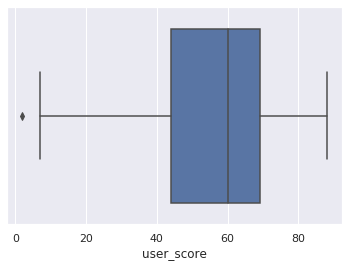

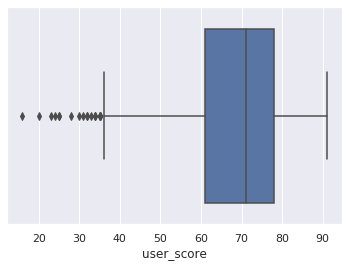

In [63]:
sns.boxplot(Sports_user_rscore);
plt.show()
sns.boxplot(Action_user_rscore);

### Выводы
Хоть распределения пользовательского рейтинга по этим двум жанрам и похожи, но статистически мы вынуждены отвергнуть гипотезу о том, что средние этих выборок равны.

## Выводы по разделу.


Статистический анализ показал, что мы не можем отвергнуть гипотезу о том, что средние пользовательский рейтинги PC и Xbox One отличаются. Следовательно, пользовательские рейтинги по разным платформам могут быть распределены схожим образом. Но при этом существуют статистические различия по рейтингам разных жанров игр.

# Общий вывод.

Мы провели исследование данных по играм продаваемых в интернет-магазине «Стримчик». В начала анализа мы избавились от строк, в которых были пропущенны данные о годе выхода и названиях игр, а также от тех, в которых отсутствует информация об оценках.

Проанализировав количество вышедших игр в год и средний цикл жизни игровой платформы, нами был определен год, после которого мы можем считать данные актуальными - 2008.
Следующие платформы были признаны потенциально прибыльными:
 - PS4;
 - XOne;
 - WiiU;
 - PC.
 
Распределение продаж игр по платформам показало, что игровые платформы имеют схожие распределения продаж, при этом большой вклад в общие продажи вносят отдельные игры, суммарные продажи которых, больше 5 млн копий.

При исследовании влияния оценок на продажи игр, мы обнаружили, что группа игр имеет большие различия в оценках критиков и пользователей, иногда доходящие до 20-30 пунктов. Такие различия мы можем списать на ангажированность игровых критиков, которые до выхода игр в общий доступ, подогревают интерес к игре, завышая оценки. Если отбросить эту группу игр, то имеем схожие значения коэффициента корреляции между оценкой пользователей, критиков и количеством проданных копий игры.
- all_sales/critic_score = 0.49
- all_sales/user_score = 0.35
- critic_score/user_score = 0.84

При этом, если не учитывать аномальную группу игр, то получим следующие коэффициенты:
- all_sales/critic_score = 0.43
- all_sales/user_score = 0.13
- critic_score/user_score = 0.64

Нами были выделены наиболее прибыльные жанры игр:
- Platform 
- Shooter  
- Sports 

Проанализировав средний портрет пользователя по региону продажи, мы можем сделать следующие рекомендации для выбора потенциально прибыльного продукта:

Для региона NA:
- самой распространенной платформой является `Xbox`(32% от всех проданных игр);
- самыми продаваемыми жанрами являются `Shooter`(21%), `Action`(25%) и `Sports`(16%);
- можно не учитывать возрастной рейтинг.

Для региона EU:
- нет сильной привязанности к платформе, допустимыми могут быть, как `PS`(26%), так и `Xbox`(22%) с `PC`(9%);
- самыми продаваемыми жанрами являются `Shooter`(20%), `Action`(27%) и `Sports`(14%), но также стоит учитывать и `Racing`(8%);
- можно не учитывать возрастной рейтинг.

Для региона JP:
- больше всего игр прдается для местных платформ -`PS`, `DS`, большей популярностью пользуются портативные игровые приставки;
- самыми популярными жанрами являются `Role-Playing`(29%), `Action`(21%) и `Platform`(10%);
- более половины всех проданных игр - не имеют возрастного рейтинга, а те, которые имеют - почти не имеют рейтинга `M`

Общие рекомендации:
- Количество проданных копий игры сильно зависит от оценки критиков, коэффициент корреляции - 0.49;
- Можно считать, что оценки не различаются по платформам, но для каждого жанра необходимо делать свою выборку;
- Необходимо делать акцент на платформы нового поколения `PS4`, `Xbox One` и `WiiU`.
